# Prime number analysis

## Presentation of the algorithm generating prime numbers
A naive way to determine if a number `n` is prime would be to iteratively divide it by each of the numbers less than itself up to 2. If the number is divisible by any of them, then it is composite (not prime), if it is not divisible by any of them it is then prime. But this process, while it may be suitable for small numbers, has the disadvantage of being particularly cumbersome for large numbers. Indeed the amount of calculation required is always equal to `n-2`

One way to optimize the algorithm would be to use the primality theorem which states that **a number `n` is prime if it is not divisible by any number smaller than its square root**. The iterative process can thus be greatly reduced.

>If we decided to check the primality of the number 101 (which is indeed prime), the naive algorithm would require performing 99 operations (101-2), but using the primality theorem, `n` becomes equal to the square root of 101 is 10, so we only perform 8 operations (10-2) instead of 99, a saving of approximately 92% on calculation time.

### Function overview
The algorithm is divided into two functions:
- `is_prime` allowing you to check if a number is prime
- `prime_gen` returning a generator of an infinite sequence of prime numbers which can be iterated

#### `is_prime`
Allows you to check if a number `n` is prime using the primality theorem. In the function we raise `n` to a power of 0.5 because this amounts to calculating its square root, plus it saves us from importing modules such as `math` or `numpy`. So, the `for` loop goes through the values going from 2 to the square root of `n` and checks if `n` is divisible with at least one of them, if so the function returns False: `n` is not prime. If the function ends the sequence having failed to divide `n` with any of these values, then `n` is prime.

In [87]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

#### `prime_gen`
This is a generating function, that is to say intended to become a generator. The function creates an infinite loop going through the numbers starting from 2 and checking, using the `is_prime` function, if each of them is prime. If this is the case, the value is returned with a `yield`. At the next requested element, the function resumes where it left off until the next `yield` encountered.

The generator can then be created by assigning this function to a variable, `primes` in our case.

In [88]:
def prime_gen():
    n = 2
    while True:
        if is_prime(n):
            yield n
        n += 1

In [89]:
# Generator creation
primes = prime_gen()

In [90]:
for _ in range(20):
    print(next(primes), end=" ")

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 

## Analysis
Prime numbers are fascinating mathematical objects, which have been studied by mathematicians since ancient times. They present many interesting patterns and some curiosities, which continue to intrigue researchers and which our generating function created above can help us explore.

### The density of prime numbers
One of the most well-known patterns is the distribution of prime numbers. We know that the **density of prime numbers tends to zero as the number increases**, but we do not know exactly how this density behaves.

To illustrate this we will create a function allowing us to generate several samples of prime numbers and to calculate for each of them, the average difference between each pair of values.

The function `mean_diff()` includes 2 parameters :
- `sample_length` : quantity of prime numbers that each sample must contain
- `sample_quantity` : number of samples

For each of these samples, the function calculates the difference between each pair of values and averages it. It is these averages which will be used to illustrate in a graph the fact that the density of prime numbers decreases as the numbers increase.

The function returns a dictionary with statistics on each of the generated samples. Each element of the dictionary is composed as follows :
- **Key** : The first and last value of the sample as a string
- **Value** : A list with 4 elements :
  - [0] : the first and last sample value in a `list`
  - [1] : the prime numbers of the sample in a `list`
  - [2] : the difference between each pair of prime numbers present in the sample in a `list`
  - [3] : the average of the differences as `int`

Here is an example function output for 5 samples of 5 prime numbers :
```
{'2 to 11': [[2, 11], [2, 3, 5, 7, 11], [1, 2, 2, 4], 2.25],
 '13 to 29': [[13, 29], [13, 17, 19, 23, 29], [4, 2, 4, 6], 4],
 '31 to 47': [[31, 47], [31, 37, 41, 43, 47], [6, 4, 2, 4], 4],
 '53 to 71': [[53, 71], [53, 59, 61, 67, 71], [6, 2, 6, 4], 4.5],
 '73 to 97': [[73, 97], [73, 79, 83, 89, 97], [6, 4, 6, 8], 6]}
```

In [91]:
import numpy as np

def mean_diff(sample_length=5, sample_quantity=5):
    gen = prime_gen()
    round_vals = 3
    L = [] # Temporary storage of sampled primes
    diffs = []
    stats = {}

    for _ in range(sample_quantity): # Number of samples
        for _ in range(sample_length): # Elements of each sample
            L.append(next(gen)) # Prime numbers generation
        
        # Calculating the difference between 
        # each pair of values in L and inserting 
        # the results into list D
        D = []
        for i in range(len(L) - 1):
            diff = round(L[i + 1] - L[i], round_vals)
            D.append(diff)
        
        diffs_mean = round(np.mean(D), round_vals) # Difference
        diffs.append(diffs_mean) # Mean calculation

        stats[f"{L[0]} to {L[-1]}"] = [[L[0], L[-1]], L, D, diffs_mean]

        L=[]

    return stats

We can now create a graph using the `matplotlib` module to plot the variation in mean difference values. We will also draw a linear regression line which will allow us to more clearly distinguish the trend of the graph.

For this illustration we will generate 10 samples each composed of 1000 prime numbers.

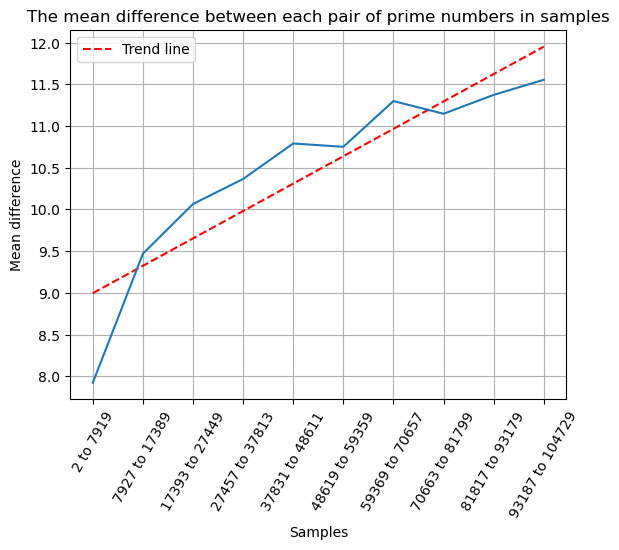

In [92]:
import matplotlib.pyplot as plt

dict_stats = mean_diff(sample_length= 1000, sample_quantity=10)
y_label = [val[3] for val in dict_stats.values()]

x_label = [key for key in dict_stats.keys()]
x = list(range(len(x_label)))
y = y_label

# Trend line
coef = np.polyfit(x, y, 1)
poly = np.poly1d(coef)
x_trend = np.linspace(min(x), max(x), 100)
y_trend = poly(x_trend)
plt.plot(x_trend, y_trend, color='red', label="Trend line",
linestyle="dashed")

plt.plot(x, y)
plt.xticks(x, x_label, rotation=60)
plt.xlabel("Samples")
plt.ylabel("Mean difference")
plt.grid(True)

plt.title("The mean difference between each pair of prime numbers in samples")
plt.legend()
plt.show()

As we can clearly see, even if there are some local fluctuations, the further we go through the numbers, the more the average difference between each pair of prime numbers increases. 

The average difference between pairs of prime numbers from 2 to 7919 is approximately 8. This average difference increases to 11.5 for prime numbers from 93187 to 104729. 

In other words, **prime numbers become rarer as we advance through the numbers**.

### Fibonacci in prime numbers

Here we will try to find out if the numbers composing the Fibonacci sequence are frequently encountered in the set of prime numbers. For this we will use `fibo()` a Fibonacci number generating function and `is_fibo()` a function based on the values generated by `fibo()` to determine whether or not a number is part of the sequence.

We will then, in a `for` loop, go through the first 10k elements of the `prime_gen` generator and check if each of these values is a fibonacci number (by submitting it to the `is_fibo()` function), if so the value will be added into a list.

In [93]:
def fibo():
    L = [0, 1]

    if L[0] == 0:
        yield L[0]
        yield L[1]

    while True:
        fibo_num = L[0] + L[1]
        L[0] = L[1]
        L[1] = fibo_num
        yield L[1]

In [94]:
def is_fibo(n):
    gen = fibo()

    while True:
        fibo_num = next(gen)

        if fibo_num == n:
            return True

        elif fibo_num < n:
            continue
        
        else:
            return False

In [95]:
def percent(partial, total, rnd=2):
    return round((partial/total) * 100, rnd)

In [120]:
def fibo_in_primes():
    first_n_primes = 10
    multiplier = 5
    L=[]
    stats={}

    while first_n_primes <= 10 * (multiplier**4):
        P = prime_gen()
        for _ in range(first_n_primes):
            prime = next(P)
            if is_fibo(prime):
                L.append(prime)

        ratio = percent(len(L), first_n_primes)
        stats[first_n_primes] = [L, ratio]

        L=[]
        first_n_primes*=multiplier

    return stats

In [121]:
stats = fibo_in_primes()
stats

{10: [[2, 3, 5, 13], 40.0],
 50: [[2, 3, 5, 13, 89], 10.0],
 250: [[2, 3, 5, 13, 89, 233], 2.4],
 1250: [[2, 3, 5, 13, 89, 233, 1597], 0.56],
 6250: [[2, 3, 5, 13, 89, 233, 1597, 28657], 0.13]}

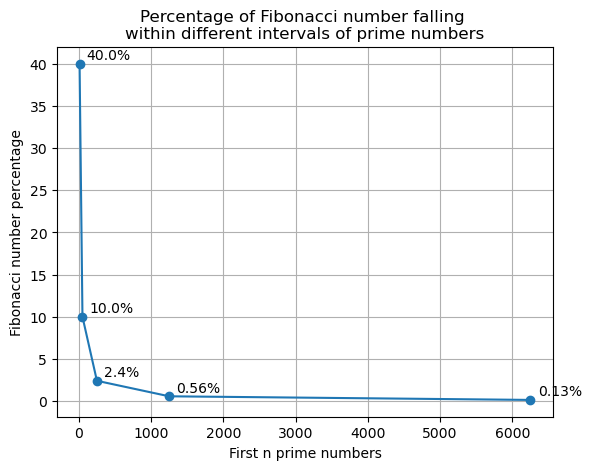

In [137]:
x = [key for key in stats.keys()]
y = [val[1] for val in stats.values()]

plt.plot(x,y, marker="o")
for x_axis, y_axis, text in zip(x, y, y):
    plt.text(x_axis+100, y_axis+0.5, str(text)+"%")

plt.grid(True)
plt.xlabel("First n prime numbers")
plt.ylabel("Fibonacci number percentage")
plt.title("Percentage of Fibonacci number falling \n"+ 
"within different intervals of prime numbers")

plt.show()

In the same way that the frequency of prime numbers decreases with increasing the value of the numbers, the density of Fibonacci numbers in the set of prime numbers also decreases as the value of these numbers increases, but the drop in density seems much more drastic here.